#Hunter Danque, Britt Adkins, Deniz Donmez
Resample Data - November 11

Resampled by a factor of 6 with cubic interpolation.
I have used 

scipy.ndimage.zoom(data, factor, order=3)

order=0 - nearest interpolation

order=1 - bilinear interpolation

order=3 - cubic interpolation

In [21]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
# folder_path = 'gdrive/My Drive/_GEOL557/data/'
%cd My\ Drive
!ls

[Errno 2] No such file or directory: 'My Drive'
/content/gdrive/My Drive
AVGVIS_SUN60m.tif  GEOL557_Shared_Lunar_DEM_Load.ipynb
_GEOL557	   SPoleDEM10mCb.tif


In [23]:
pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

In [44]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib.pyplot as plt
from scipy import ndimage, misc # for resampling

In [ ]:
#%cd /content/gdrive/My Drive/Colab/ #path to folder with the data on My Drive
# !cd /content/gdrive/Shared\ drives/GEOL557_Group_Project/data #/content/gdrive/Shared\ drives/GEOL557_Group_Project/data path to folder with the data on Shared drive

In [ ]:
%pwd

'/content/gdrive/My Drive'

In [ ]:
%ls #verify the files

AVGVIS_SUN60m.tif  _GEOL557/  GEOL557_Shared_Lunar_DEM_Load.ipynb


In [29]:
with rio.open('AVGVIS_SUN60m.tif') as AVGVIS_SUN60m:
      AVGVIS_SUN60m_np= AVGVIS_SUN60m.read(1)


In [30]:
AVGVIS_SUN60m

<closed DatasetReader name='AVGVIS_SUN60m.tif' mode='r'>

In [32]:
AVGVIS_SUN60m_np

array([[32767, 32767,  6154, ...,  3168,  3175,  3182],
       [32767, 32767,  6470, ...,  3093,  3172,  3178],
       [32767, 32767,  6663, ...,  3152,  3167,  3174],
       ...,
       [32767, 32767,  7738, ...,   899,   816,   758],
       [32767, 32767,  7800, ...,   952,  1013,   959],
       [32767, 32767,  7817, ...,  1257,  1197,  1153]], dtype=int16)

In [35]:
df_AVGVIS_SUN60m_np = pd.DataFrame(data=AVGVIS_SUN60m_np) #Numpy array to Pandas dataframe

In [41]:
df_AVGVIS_SUN60m_np.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174,1175,1176,1177,1178,1179,1180,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190,1191,1192,1193,1194,1195,1196,1197
0,32767,32767,6154,6178,6134,6015,5886,5733,5585,5447,5317,5213,5129,5040,4944,4884,4880,4933,5016,5178,5393,5586,5787,6010,6257,6526,6798,7053,7298,7638,7945,8107,8198,8264,8314,8367,8441,8511,8569,8623,...,3026,3035,3044,3052,3062,1331,1598,2974,3095,3105,3115,3125,3133,3142,3151,3156,3159,2539,2215,2800,2965,2338,2426,2647,2310,1733,758,578,1312,1745,1960,2247,2528,2788,3009,3127,3158,3168,3175,3182
1,32767,32767,6470,6449,6397,6311,6198,6023,5882,5754,5623,5509,5403,5306,5225,5169,5150,5174,5269,5423,5563,5725,5943,6159,6414,6698,6962,7214,7227,7500,7954,8150,8235,8306,8366,8421,8472,8536,8601,8657,...,3015,3025,3033,3042,3052,2760,2836,3078,3089,3098,3108,3117,3126,3136,3144,3150,3154,2737,2584,2956,3130,3062,3027,2704,2232,1424,664,940,1698,1565,1664,2215,2518,2776,3016,3135,3063,3093,3172,3178
2,32767,32767,6663,6645,6606,6546,6409,5730,5763,6020,5877,5768,5653,5564,5501,5439,5416,5448,5527,5648,5764,5881,6074,6306,6570,6845,7087,7336,7548,7698,7684,7847,8165,8325,8395,8454,8478,8545,8631,8692,...,3006,3015,3023,3033,3042,3036,3049,3070,3081,3090,3100,3110,3119,3128,3135,3141,3147,3106,3092,3059,3097,3154,2864,1778,1274,1030,844,794,1005,1144,1528,2130,2524,2818,3024,3130,3144,3152,3167,3174
3,32767,32767,6804,6798,6771,6730,6671,6512,5621,5687,6159,6007,5867,5801,5753,5700,5691,5714,5757,5822,5932,6074,6256,6477,6728,6998,7249,7503,7689,7819,7901,8046,8217,8331,8358,8425,8503,8583,8666,8709,...,2999,3006,3014,3022,3030,3040,3051,3061,3071,3081,3091,3103,3113,3120,3127,3133,3140,3146,3148,3141,2990,2777,2594,2588,2522,2089,1454,931,1007,1363,1733,2163,2544,2833,3016,3108,3146,3157,3162,3170
4,32767,32767,6902,6897,6880,6861,6825,6761,6556,6435,6379,6258,6137,6067,6026,5982,5969,5969,5981,6020,6096,6213,6398,6588,6846,7140,7384,7613,7796,7925,7954,8101,8230,8319,8360,8183,8157,8476,8713,8789,...,2990,2984,2983,3003,3021,3031,3042,3052,3062,3074,3084,3095,3105,3113,3120,3128,3135,3141,3146,3148,3130,2870,2574,2456,2685,2631,1783,1276,814,769,1445,2044,2521,2872,3041,2682,2813,3153,3158,3166


In [37]:
df_AVGVIS_SUN60m_np.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Columns: 1198 entries, 0 to 1197
dtypes: int16(1198)
memory usage: 1.8 MB


In [49]:
# http://scipy.github.io/devdocs/generated/scipy.ndimage.zoom.html#scipy.ndimage.zoom
resample_avgvis_sun60m=ndimage.zoom(AVGVIS_SUN60m_np, 6, order=3)
df_resample_avgvis_sun60m = pd.DataFrame(data=resample_avgvis_sun60m)
df_resample_avgvis_sun60m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4704 entries, 0 to 4703
Columns: 7188 entries, 0 to 7187
dtypes: int16(7188)
memory usage: 64.5 MB


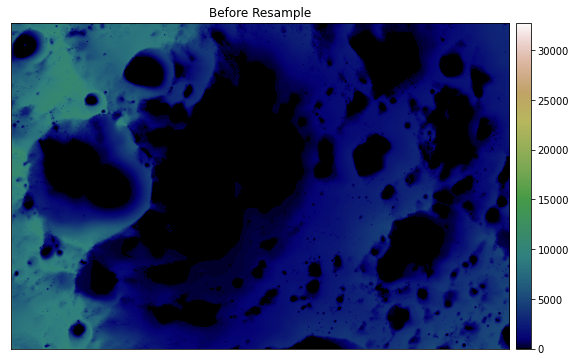

In [54]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_AVGVIS_SUN60m_np,
    cmap="gist_earth",
    title="Before Resample",
    figsize=(10, 6),
)
plt.show()

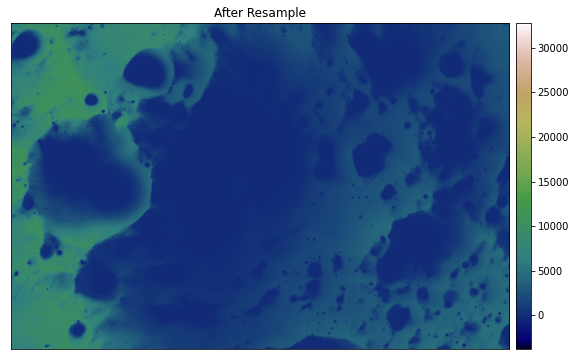

In [55]:
# Plot the data https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
ep.plot_bands(
    df_resample_avgvis_sun60m,
    cmap="gist_earth",
    title="After Resample",
    figsize=(10, 6),
)
plt.show()

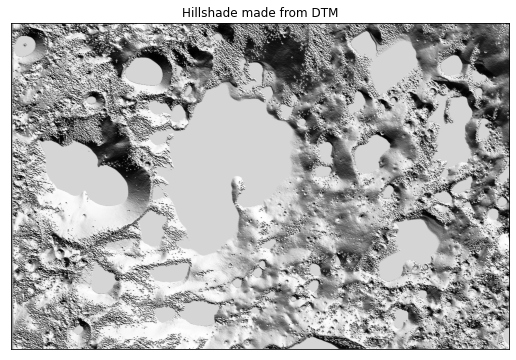

In [53]:
# Create and plot the hillshade with earthpy https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_resample_avgvis_sun60m)

ep.plot_bands(
    hillshade, cbar=False, title="Hillshade made from DTM", figsize=(10, 6),
)
plt.show()